In [1]:
%pip install cvxpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import cvxpy as cp

In [3]:
#coords = np.random.randint(0, 100, size=(50,2))

In [4]:
coords = np.array([[76, 8], [77, 98], [75, 95], [22, 74], [79, 76], [61, 16], [66, 93], [ 9, 14], [ 2, 62], [63, 48], [ 6, 97], [12, 94], [48, 84], [26, 10], [74, 41], [83, 10], [47, 49], [36, 11], [47, 91], [36, 77], [56, 28], [18, 23], [22, 86], [76, 81], [ 8, 39], [21, 88], [88, 17], [ 4, 20], [83, 76], [ 5, 80], [41, 61], [72, 70], [22, 85], [30, 41], [34, 97], [66, 1], [ 9, 52], [97, 66], [73, 76], [66, 27], [54, 62], [56, 62], [ 2, 90], [45, 76], [29, 64], [43, 48], [20, 96], [15, 4], [20, 47], [78, 61]])

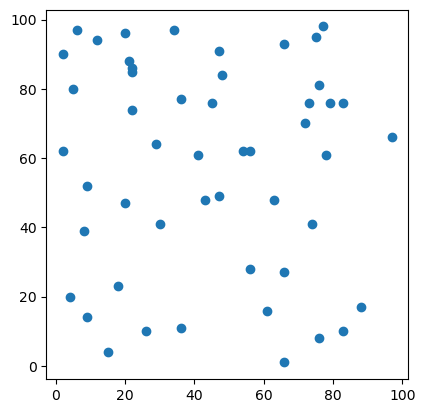

In [5]:
plt.scatter(coords[:,0], coords[:,1])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

In [6]:
# the optimal server location, using cvxpy
x = cp.Variable((1, 2))
obj = cp.Minimize(cp.sum(cp.norm(coords - x, 2, axis=1)))
problem = cp.Problem(obj)
problem.solve()

1890.8766374861061

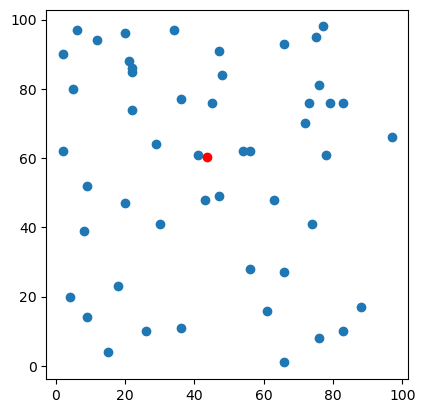

In [7]:
# plot the solution
plt.scatter(coords[:,0], coords[:,1])
plt.scatter(x.value[:,0], x.value[:,1], color='red')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
def obj(x):
    return 0

In [8]:
def grad(x):
    return np.array([0, 0])

In [10]:
# gradient descent
x = coords[0]
ep = 1e-6
beta = 0.7
while np.linalg.norm(grad(x)) > ep:
    del_x = -grad(x)
    # use backtracking search to find t
    t = 1
    while obj(x + del_x) > (obj(x) - (t / 2) * np.linalg.norm(del_x)**2):
        t = beta * t
    x = x + t * del_x
x

array([76,  8])